# MACD, <span style="font-size:75%;"><span style="font-family: serif; font-style: italic;">Moving Average Convergence Divergence</span>（移動平均収束拡散法）</span>

In [324]:
import datetime
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import talib
from matplotlib import dates as mdates

### EMA の算出

In [325]:
def ema_numpy(values, period):
    alpha = 2 / (period + 1)
    ema = np.zeros_like(values, dtype=float)
    ema[0] = values[0]
    for i in range(1, len(values)):
        ema[i] = alpha * values[i] + (1 - alpha) * ema[i-1]
    return ema

## Matplotlib の設定

In [326]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

## ティックデータの読込

In [327]:
file = "ticks_20251121.xlsx"
body = os.path.splitext(os.path.basename(file))[0]
path_excel = os.path.join("..", "collection", file)
code = "7011"
df = pd.read_excel(path_excel, sheet_name=code)
df.index = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in df["Time"]])
df

,Time,Price,Volume
2025-11-21 09:06:01.418269,1.763684e+09,3910,2043200
2025-11-21 09:06:02.422864,1.763684e+09,3910,2043200
2025-11-21 09:06:03.407360,1.763684e+09,3920,2145400
2025-11-21 09:06:04.424680,1.763684e+09,3920,2145400
2025-11-21 09:06:05.431013,1.763684e+09,3903,2278200
...,...,...,...
2025-11-21 15:24:55.751290,1.763706e+09,3910,29029900
2025-11-21 15:24:56.744629,1.763706e+09,3911,29031700
2025-11-21 15:24:57.744722,1.763706e+09,3911,29031700
2025-11-21 15:24:58.750131,1.763706e+09,3908,29037700


## TA-Lib を利用して MACD を算出

In [328]:
period_fast = 150
pariod_slow = 600
period_signal = 270
macd, macdsignal, macdhist = talib.MACD(
    df["Price"],
    fastperiod=period_fast,
    slowperiod=pariod_slow,
    signalperiod=period_signal,
)

In [329]:
macd

2025-11-21 09:06:01.418269         NaN
2025-11-21 09:06:02.422864         NaN
2025-11-21 09:06:03.407360         NaN
2025-11-21 09:06:04.424680         NaN
2025-11-21 09:06:05.431013         NaN
                                ...   
2025-11-21 15:24:55.751290    6.877877
2025-11-21 15:24:56.744629    6.878598
2025-11-21 15:24:57.744722    6.879004
2025-11-21 15:24:58.750131    6.849349
2025-11-21 15:24:59.751669    6.819881
Length: 19062, dtype: float64

In [330]:
macdsignal

2025-11-21 09:06:01.418269         NaN
2025-11-21 09:06:02.422864         NaN
2025-11-21 09:06:03.407360         NaN
2025-11-21 09:06:04.424680         NaN
2025-11-21 09:06:05.431013         NaN
                                ...   
2025-11-21 15:24:55.751290    6.233210
2025-11-21 15:24:56.744629    6.237973
2025-11-21 15:24:57.744722    6.242704
2025-11-21 15:24:58.750131    6.247181
2025-11-21 15:24:59.751669    6.251407
Length: 19062, dtype: float64

In [331]:
macdhist

2025-11-21 09:06:01.418269         NaN
2025-11-21 09:06:02.422864         NaN
2025-11-21 09:06:03.407360         NaN
2025-11-21 09:06:04.424680         NaN
2025-11-21 09:06:05.431013         NaN
                                ...   
2025-11-21 15:24:55.751290    0.644667
2025-11-21 15:24:56.744629    0.640625
2025-11-21 15:24:57.744722    0.636301
2025-11-21 15:24:58.750131    0.602168
2025-11-21 15:24:59.751669    0.568474
Length: 19062, dtype: float64

In [332]:
df["MA60"] = df["Price"].rolling(60, min_periods=1).mean()
df["EMA600"] = ema_numpy(list(df["Price"]), 600)
df

,Time,Price,Volume,MA60,EMA600
2025-11-21 09:06:01.418269,1.763684e+09,3910,2043200,3910.000000,3910.000000
2025-11-21 09:06:02.422864,1.763684e+09,3910,2043200,3910.000000,3910.000000
2025-11-21 09:06:03.407360,1.763684e+09,3920,2145400,3913.333333,3910.033278
2025-11-21 09:06:04.424680,1.763684e+09,3920,2145400,3915.000000,3910.066445
2025-11-21 09:06:05.431013,1.763684e+09,3903,2278200,3912.600000,3910.042929
...,...,...,...,...,...
2025-11-21 15:24:55.751290,1.763706e+09,3910,29029900,3909.266667,3901.741493
2025-11-21 15:24:56.744629,1.763706e+09,3911,29031700,3909.300000,3901.772304
2025-11-21 15:24:57.744722,1.763706e+09,3911,29031700,3909.333333,3901.803012
2025-11-21 15:24:58.750131,1.763706e+09,3908,29037700,3909.300000,3901.823634


## プロット

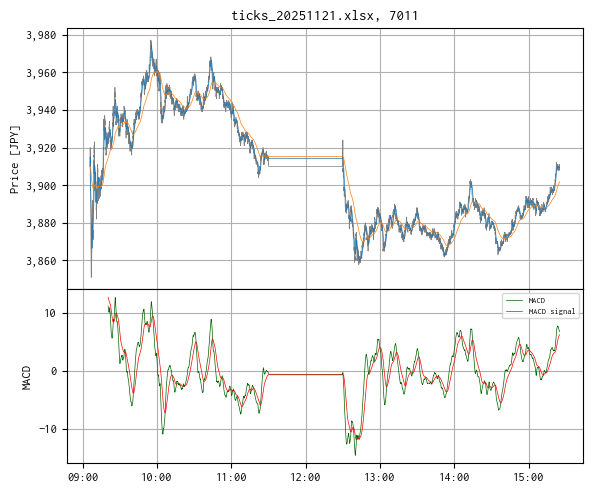

In [333]:
fig = plt.figure(figsize=(6, 5))
n = 2
ax = dict()
gs = fig.add_gridspec(
    n,
    1,
    wspace=0.0,
    hspace=0.0,
    height_ratios=[3 if i == 0 else 2 for i in range(n)],
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# 株価
ax[0].plot(df["Price"], color="gray", lw=0.5, label="株価")
ax[0].plot(df["MA60"], color="C0", lw=0.5, label="MA60")
ax[0].plot(df["EMA600"], color="C1", lw=0.5, label="EMA600")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_ylabel("Price [JPY]")
ax[0].set_title(f"{file}, {code}")

# MACD
ax[1].plot(macd, color="darkgreen", lw=0.5, label="MACD")
ax[1].plot(macdsignal, color="red", lw=0.5, label="MACD signal")
#ax[1].bar(macdhist.index, macdhist, lw=0.75, label="macdhist")
ax[1].set_ylabel("MACD")
ax[1].legend(fontsize=6)

plt.tight_layout()
plt.show()